# Logistic regression

### Dataset: German Credit

- Creditability: 1- Person is not at risk, 0- Pesron is at risk(defaulter)

- CreditAmount: Amount for which credit was given (Euro)

- DurationOfCreditInMonths: Duration for which the credit is given in months

# Objective

Estimate probabilities whether a person would default or not using logistic regression

# 1. Load Libraries and data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Load data
credit_df = pd.read_excel('German_Credit.xlsx')

# read_excel is used to read xlsx files

In [4]:
#Print header of the file
credit_df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [5]:
credit_df.shape
# gives number of rows and columns

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

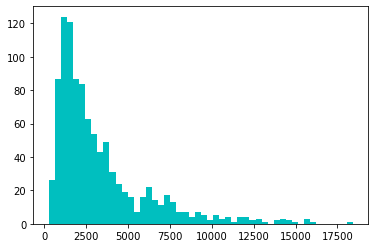

In [6]:
plt.hist(credit_df['CreditAmount'], bins= 50, color='C') # used to plot histogram with 50 bins
plt.show()

`Positively Skewed or Right tailed`

In [7]:
credit_df['CreditAmount'].skew()

# To find the skewness od credit amount

1.9495942869127831

# 4. Convert 'CreditAmount' into a categorical feature by grouping with start and end of interval as:
-  (0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000)

In [8]:
credit_df['CreditAmount']

0       1049
1       2799
2        841
3       2122
4       2171
       ...  
995     1987
996     2303
997    12680
998     6468
999     6350
Name: CreditAmount, Length: 1000, dtype: int64

In [9]:
# Binning

bin_edges = [0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000]         # edges to define intervals
bin_labels = ['0-500', '501-1000', '1001-1500','1501-2000', '2001-2500', '2501-5000',
              '5001-7500','7501-10000', '10001-15000', '15001-20000']               # labels to denote each interval
credit_df['CreditAmount'] = pd.cut(credit_df['CreditAmount'], bins=bin_edges , labels=bin_labels)
# pd.cut is used to divide the continous column in different groups as per bin egges and named according to bin label.

In [10]:
credit_df['CreditAmount']

0        1001-1500
1        2501-5000
2         501-1000
3        2001-2500
4        2001-2500
          ...     
995      1501-2000
996      2001-2500
997    10001-15000
998      5001-7500
999      5001-7500
Name: CreditAmount, Length: 1000, dtype: category
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

# 5. Create histogram to represent count of different 'Creditability' under each group of 'CreditAmount'

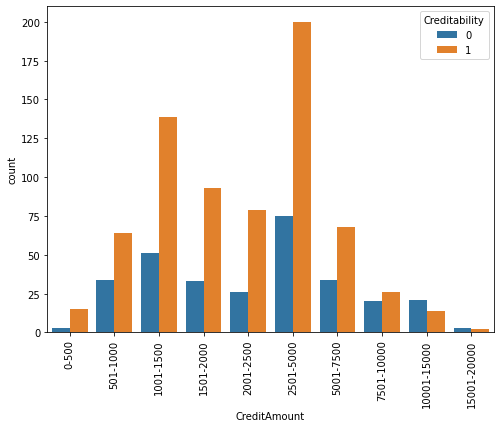

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'CreditAmount',data=credit_df,hue='Creditability')
# it plots a barplot where y axis shows the count of each category and here 'hue' is used to represent diffrenent class of target
plt.xticks(rotation=90) # to rotate labels of x-axis
plt.show()

# 6. Find out total number Creditability in each interval of CreditAmount

In [12]:
credit_df.groupby('CreditAmount')['Creditability'].count()

## Maximum values are in the interval 2501-5000

CreditAmount
0-500           18
501-1000        98
1001-1500      190
1501-2000      126
2001-2500      105
2501-5000      275
5001-7500      102
7501-10000      46
10001-15000     35
15001-20000      5
Name: Creditability, dtype: int64

# 7. Find out total number of Creditability where Creditability is '0' and Creditability is '1' in each interval of CreditAmount

In [13]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'])
#it shows the frequencies between the categories of two different features

Creditability,0,1
CreditAmount,,
0-500,3,15
501-1000,34,64
1001-1500,51,139
1501-2000,33,93
2001-2500,26,79
2501-5000,75,200
5001-7500,34,68
7501-10000,20,26
10001-15000,21,14


In [14]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'],normalize='columns')
# it shows % distribution of each class in different interval of CreditAmount

Creditability,0,1
CreditAmount,,
0-500,0.01,0.02
501-1000,0.11,0.09
1001-1500,0.17,0.20
1501-2000,0.11,0.13
2001-2500,0.09,0.11
2501-5000,0.25,0.29
5001-7500,0.11,0.10
7501-10000,0.07,0.04
10001-15000,0.07,0.02


# 8. Prepare input data for the model

In [15]:
credit_df['CreditAmount'].unique()
# Displays all the unique value in the column

## Because of binning the categories are set in increasing order

[1001-1500, 2501-5000, 501-1000, 2001-2500, 5001-7500, 1501-2000, 7501-10000, 0-500, 10001-15000, 15001-20000]
Categories (10, object): [0-500 < 501-1000 < 1001-1500 < 1501-2000 ... 5001-7500 < 7501-10000 < 10001-15000 < 15001-20000]

In [16]:
credit_df['CreditAmount'] = credit_df['CreditAmount'].cat.codes

# Converting categorical values inot numbers w.r.t their order, 0-500 is '0' and 15001-20000 is '9'

In [17]:
credit_df['CreditAmount'].unique()

array([2, 5, 1, 4, 6, 3, 7, 0, 8, 9], dtype=int8)

### Separate dependent and independent variables

In [18]:
#separating dependent and independent variables
X = credit_df.drop("Creditability",axis=1)
Y = credit_df.Creditability.astype('category')

In [19]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Creditability, Length: 1000, dtype: category
Categories (2, int64): [0, 1]

### Split data into train and test

In [20]:
# Spilting the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

# 9. Predict Target Variable for Test Data using Sklearn

In [21]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)

LogisticRegression(random_state=7)

In [22]:
y_predicted =  lr.predict(X_test)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

# 10. Try calculating Probabilities of Target using Sklearn

In [23]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]

z['Predicted'] = lr.predict(X_test)                               # Predicting target variable using sklearn Logistic regression

z.head()

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,0.34,0.66,1
1,1,0.30,0.70,1
2,1,0.22,0.78,1
3,1,0.21,0.79,1
4,1,0.29,0.71,1


# 11. Build a confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

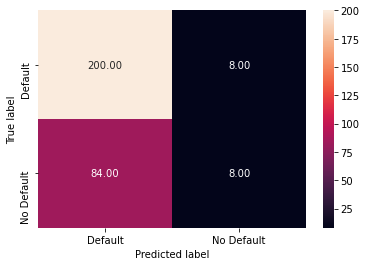

In [26]:
draw_cm( z['Actual'], z['Predicted'] )
# draw_cm( y_test, lr.predict(X_test) )

In [27]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, lr.predict(X_test) ), 2 ) )

Total Accuracy :  0.69


# 12.  Predicted Probability distribution Plots for defaulters and non defaulters

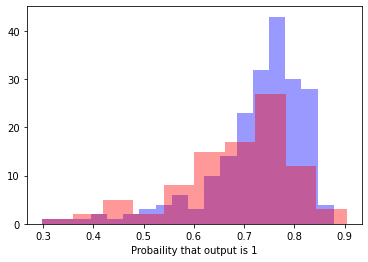

In [28]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'b' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'r' )
plt.show()

# Additional Content

## Fit logistic regression model  (Statsmodel)

In [29]:
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.580418
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.046     
Dependent Variable:    Creditability      AIC:                818.5847  
Date:                  2020-09-10 21:09   BIC:                832.2379  
No. Observations:      700                Log-Likelihood:     -406.29   
Df Model:              2                  LL-Null:            -425.90   
Df Residuals:          697                LLR p-value:        3.0612e-09
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     1.5089   0.2006  7.5200 0.0000  1.1156  1.9022
CreditAmount              0.1312   0.0572  2.2917 0.0219  0.0190  0.2434
DurationOfCreditInMonths -0.0525   0.0091 -5.7444 0.0000 -0.0705 -0.0346
========================================================================

"""

## Convert probabilities to target variable

In [30]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:5]

,actual,predicted_prob,predicted
521,0,0.66,1
737,1,0.70,1
740,1,0.78,1
660,1,0.79,1
411,1,0.71,1
